In [2]:
#imports
from bioreactors import logparse
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
# 1-16 slots
turbi_ids = list(range(1,17))

In [4]:
# get the turbidity data points for all of them
turbi_data = {}
for turbi_id in turbi_ids:
    turbi_data_this = logparse.find_lines_with_str(
                                    patterns_str=['received turbidity reading','R'+str(turbi_id)+'='],
                                    log_folder='../../experiments-data/2019-02-25_rotation-calibration_all-vessels/', 
                                    data_patterns_str=['T', 'R'+str(turbi_id)])
    turbi_times = [r['T'] for r in turbi_data_this]
    turbi_readings = [r['R'+str(turbi_id)] for r in turbi_data_this]
    avg_readings_10s = []
    avg_readings_4s = []
    avg_readings_all = []
    for i in range(int(len(turbi_readings)/12)):
        avg_readings_10s.append(np.mean(np.array(turbi_readings[12*i:12*i+6])))
        avg_readings_4s.append(np.mean(np.array(turbi_readings[12*i+6:12*(i+1)])))
        avg_readings_all.append(np.mean(np.array(turbi_readings[12*i:12*(i+1)])))        
    turbi_data[turbi_id] = {'10s':np.array(avg_readings_10s),'4s':np.array(avg_readings_4s),'all':np.array(avg_readings_all)}

In [5]:
# compute the real ntu for each turbi
real_ntus = {turbi_id:[] for turbi_id in turbi_ids}
real_ntu_base = [0,0] + [4000,2000,1000,500,250,125,62.5] + [3000,1500,750,375,187.5,93.75,46.875]
for i in range(len(real_ntu_base)):
    for turbi_id in turbi_ids:
        real_ntus[turbi_id].append(real_ntu_base[turbi_id-1])
    real_ntu_base = real_ntu_base[-1:] + real_ntu_base[:-1]
for turbi_id in turbi_ids:
    real_ntus[turbi_id] = np.array(real_ntus[turbi_id])

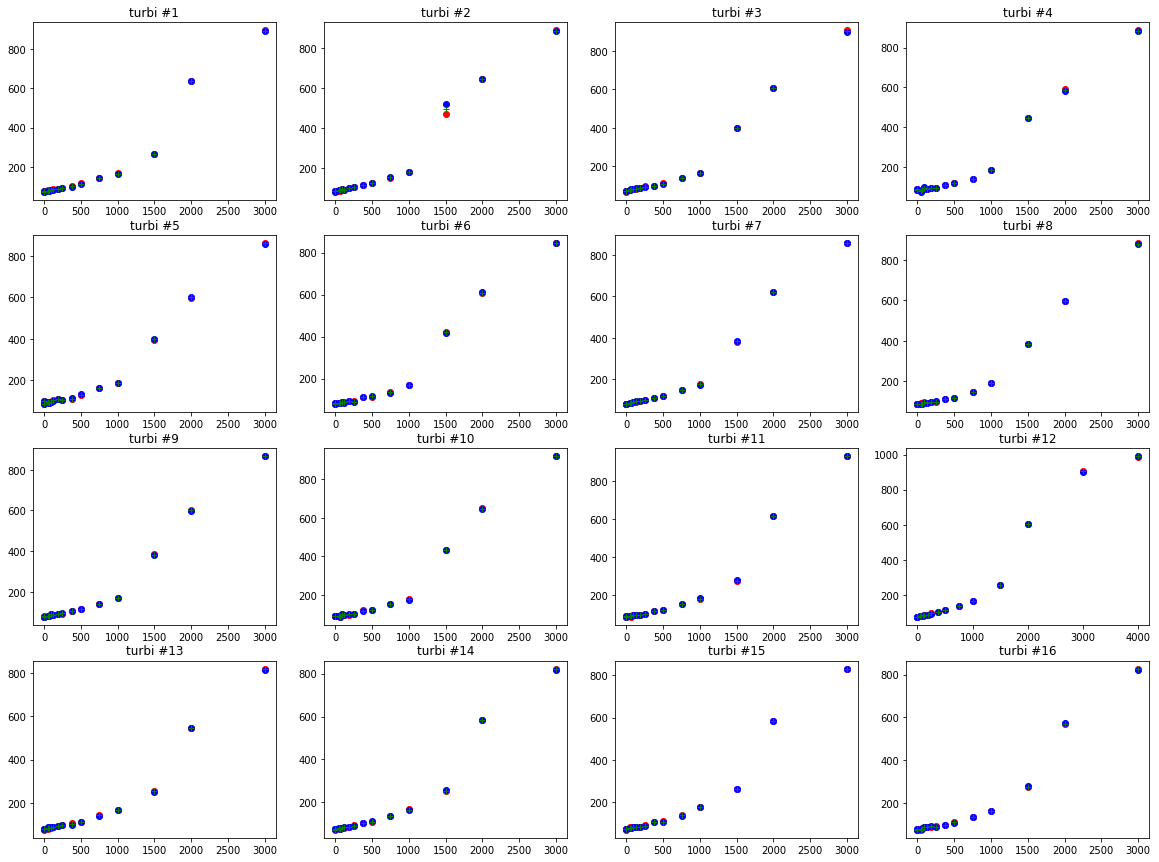

In [6]:
plt.figure(figsize=(20,15))
for index,turbi_id in enumerate(turbi_ids):
    ax = plt.subplot(4,4,index+1)
    plt.plot(real_ntus[turbi_id][turbi_data[turbi_id]['10s']<1000],
             turbi_data[turbi_id]['10s'][turbi_data[turbi_id]['10s']<1000],'ro')
    
    plt.plot(real_ntus[turbi_id][turbi_data[turbi_id]['4s']<1000],
             turbi_data[turbi_id]['4s'][turbi_data[turbi_id]['4s']<1000],'bo')
    
    plt.plot(real_ntus[turbi_id][turbi_data[turbi_id]['all']<1000],
             turbi_data[turbi_id]['all'][turbi_data[turbi_id]['all']<1000],'g+')

    plt.title('turbi #%i'%turbi_id)

In [11]:
import pandas as pd
for turbi_id in turbi_ids:
    data = {'readings':turbi_data[turbi_id]['all'], 'ntu':real_ntus[turbi_id]}
    df = pd.DataFrame.from_dict(data)
    df = df[df['readings']<1023]
    df = df.sort_values(by=['ntu'])
    df.to_csv('calib-data/calib-data_vessel-slot-'+str(turbi_id)+'.csv')